# Bootstrapping c Analysis

A notebook to collect results of the non-oracle settings, where we must employ some bootstrap estimator of the $1-\alpha$ quantile of the distribution of worst case differences. Here, we collect consistency and coverage results for these estimators for a variety of settings, in the *non-extremal* and *extremal* cases, and using the empirical survival function as the function estimator, as well as some estimators which are extreme-value motivated.

Jimmy Butler;
February 2025

## Math Recap

Suppose $X_{1}, \dots, X_{n} \overset{iid}{\sim} F$, a bivariate probability distribution. Let $\bar{F}: \mathbb{R}^{2} \to \mathbb{R}$ be the probability distribution's true survival function, and let $\hat{\bar{F}}: \mathbb{R}^{2} \to \mathbb{R}$ be an estimate. Denote the true $p$-isoline of this probability distribution as 
$$\ell_{X}(p) = \{x \in \mathbb{R}^{2} : \bar{F}(x) = p\}.$$
We wish to construct a confidence set $\hat{C}$ such that $\mathbb{P}[\ell_{X}(p) \subseteq \hat{C}] = 1-\alpha$, or at least as $n \to \infty$.

Like Mammen and Polonik (2013), we will restrict the class of potential $\hat{C}$ to a construction where we take the points at which the estimate of the survival function is within an $\epsilon$-neighborhood if the desired $p$, as below
$$\hat{C}(\epsilon) = \{x \in \mathbb{R}^{2} : p - \epsilon \leq \hat{\bar{F}}(x) \leq p + \epsilon \}$$.

First, note the following equivalence of events:
$$\left\{ \sup_{x \in \ell_{X}(p)} |\hat{\bar{F}}(x) - p| \leq \epsilon \right\} = \left\{ \ell_{X}(p) \subseteq \hat{C}(\epsilon) \right\}$$

We want to choose $\epsilon$ such that the event on the righthand side of the equality (the coverage event) has probability $1-\alpha$. The $\epsilon$ that makes the equivalent event on the lefthand side have probability $1-\alpha$ is simply the $1-\alpha$ quantile of the random variable $\sup_{x \in \ell_{X}(p)} |\hat{\bar{F}}(x) - p|$. Denote this $1-\alpha$ quantile as $c_{1-\alpha}$.

Of course, $c_{1-\alpha}$ has unknown distribution, and depends on the very thing we are trying to capture with a confidence tube. However, we can try to use a bootstrap to estimate this quantity, and assuming consistency of the bootstrap kicks in, we will have the right coverage!

**Note:** the above construction makes no assumptions on the distribution we are drawing from, or which estimate of the survival function we are using. Of course, when using the bootstrap, assumptions may come into play in order to guarantee consistency, but in the oracle case at least, this logic holds generally for any survival function estimator.

## Empirical Survival Function

In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tidyr’ was built under R version 4.2.3”


## Consistency Check

In [2]:
path <- '/pscratch/sd/j/jbbutler/bootstrap_c_tubes/dist/bivt/full_coverage_results.RData'
res <- readRDS(path)
res$alphas <- as.factor(res$alphas)
res$p <- as.factor(res$p)

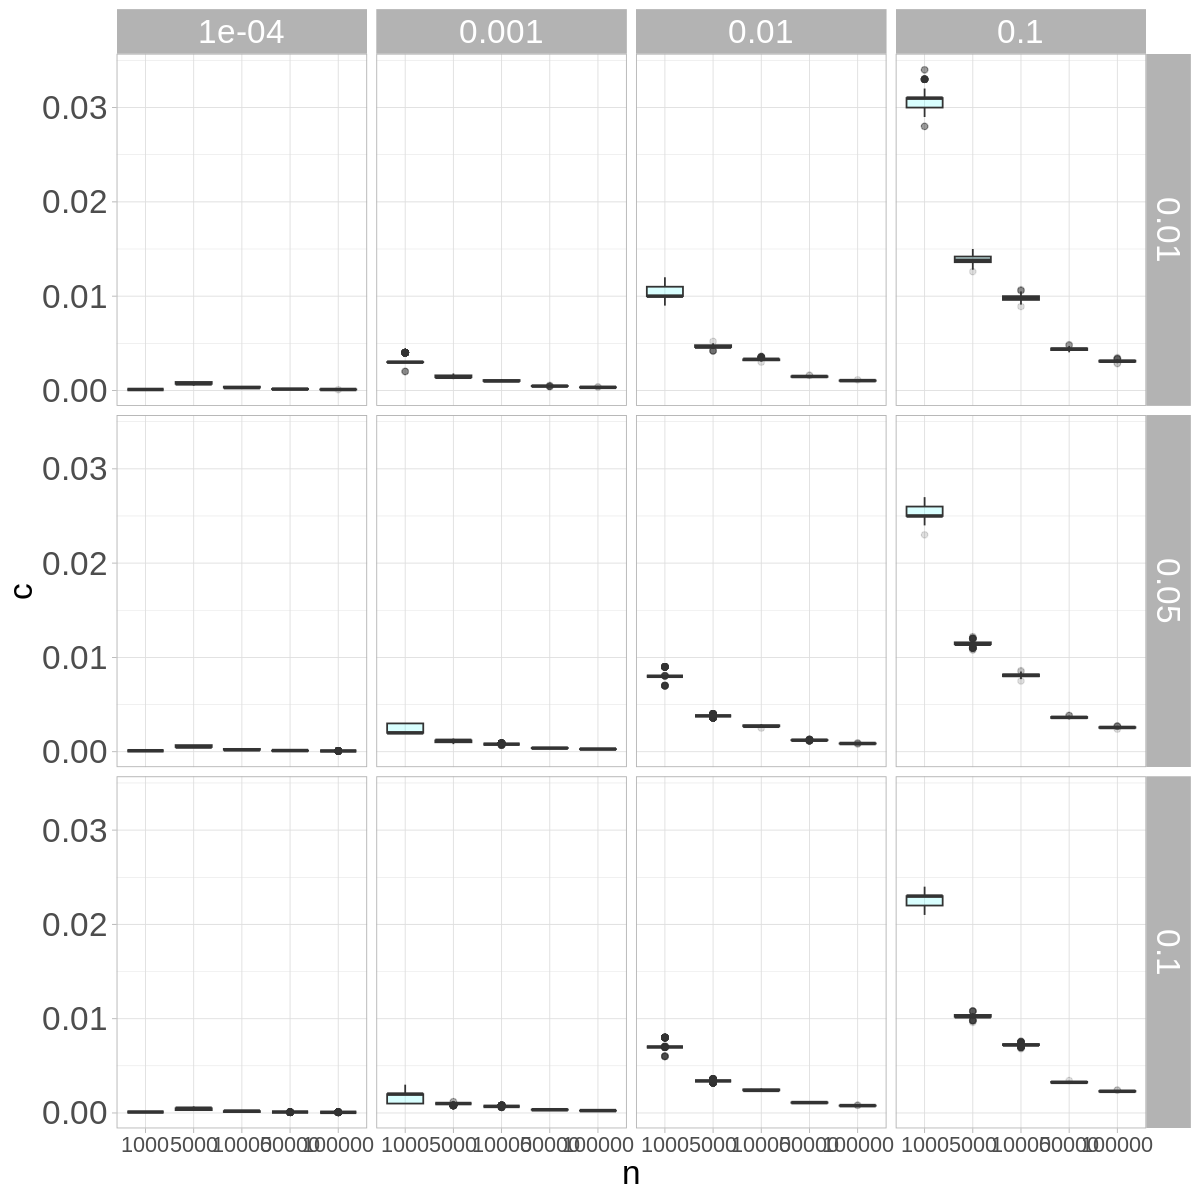

In [3]:
options(repr.plot.width=10, repr.plot.height=10, scipen=999)

ggplot() + geom_boxplot(data=res, aes(x=as.factor(n), y=c_alphas, group=n), fill='cyan', alpha=0.15) + facet_grid(alphas ~ p) +
    xlab('n') +
    ylab('c') +
    theme_light() +
    theme(legend.title=element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=13), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20), strip.text.x = element_text(size = 20), strip.text.y = element_text(size = 20))

## Coverage Evaluation

In [4]:
cov_res <- res %>% group_by(n, p, alphas) %>% summarize(covrate=mean(is_covereds))

meta_alpha <- 0.05
uncertainty <- qnorm(1-(meta_alpha/2))*(sqrt((cov_res$covrate*(1-cov_res$covrate))/500))
uncertainty <- round(uncertainty, 3)
cov_res$uncertainty <- uncertainty

`summarise()` has grouped output by 'n', 'p'. You can override using the
`.groups` argument.


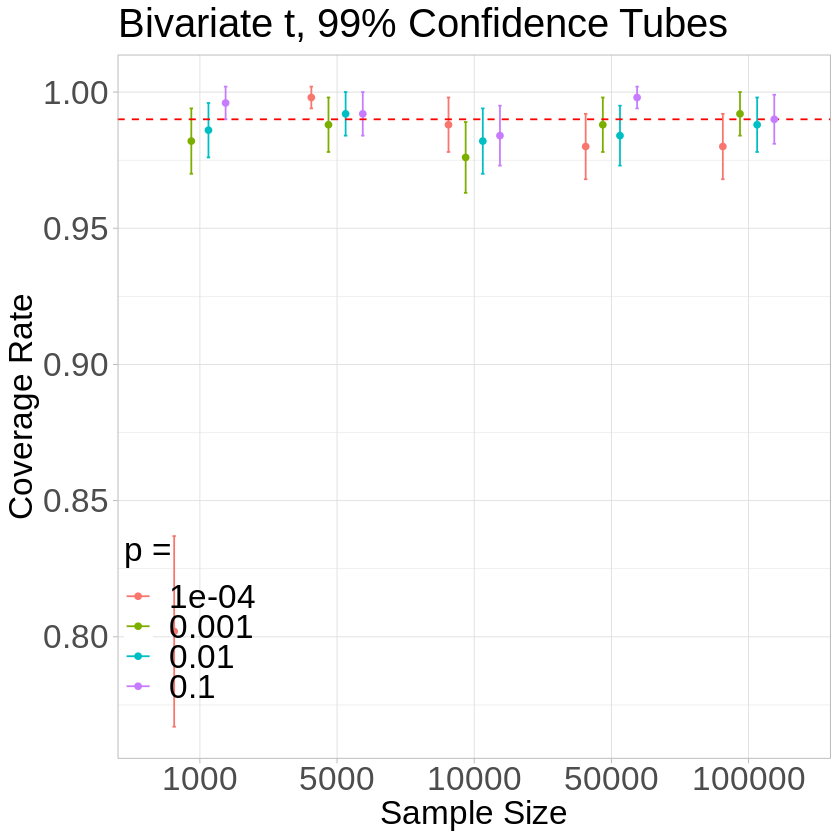

In [5]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.01
plt <- ggplot(cov_res %>% filter(alphas==a), aes(color=as.factor(p))) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_point(aes(x=as.factor(n), y=covrate), position=position_dodge(width=0.5)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Tubes')) + 
guides(color=guide_legend(title='p = ')) +
theme(legend.title=element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt

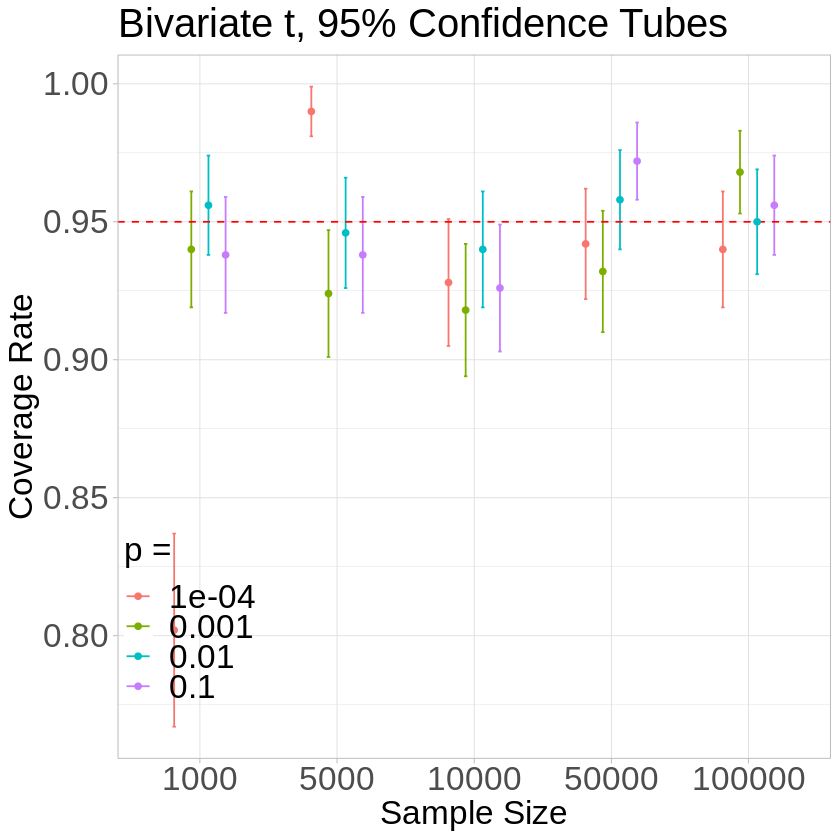

In [6]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.05
plt <- ggplot(cov_res %>% filter(alphas==a), aes(color=as.factor(p))) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_point(aes(x=as.factor(n), y=covrate), position=position_dodge(width=0.5)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Tubes')) + 
guides(color=guide_legend(title='p = ')) +
theme(legend.title=element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt

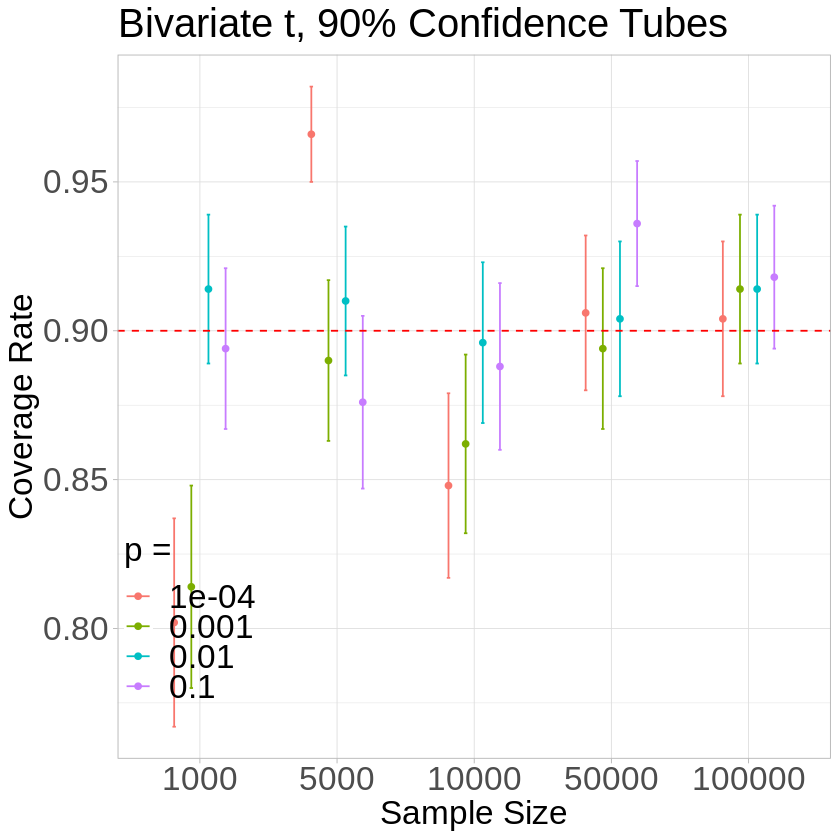

In [7]:
options(repr.plot.width=7, repr.plot.height=7)
a <- 0.1
plt <- ggplot(cov_res %>% filter(alphas==a), aes(color=as.factor(p))) + 
geom_errorbar(aes(x = as.factor(n), ymin=covrate-uncertainty, 
                  ymax=covrate+uncertainty, color=as.factor(p)), width=.1, 
                position=position_dodge(width=0.5)) + 
geom_hline(yintercept = 1-a, color='red', linetype='dashed') +
xlab('Sample Size') + ylab('Coverage Rate') +
geom_point(aes(x=as.factor(n), y=covrate), position=position_dodge(width=0.5)) + theme_light() + 
ggtitle(paste0('Bivariate t, ', (1-a)*100, '% Confidence Tubes')) + 
guides(color=guide_legend(title='p = ')) +
theme(legend.title=element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=20), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))

plt

In [29]:
ps <- as.numeric(levels(res$p))[as.numeric(res$p)]
res$is_unbounded <- res$c_alphas >= ps
unbound_res <- res %>% group_by(n, p, alphas) %>% summarize(unbounded_rate=mean(is_unbounded))

`summarise()` has grouped output by 'n', 'p'. You can override using the
`.groups` argument.


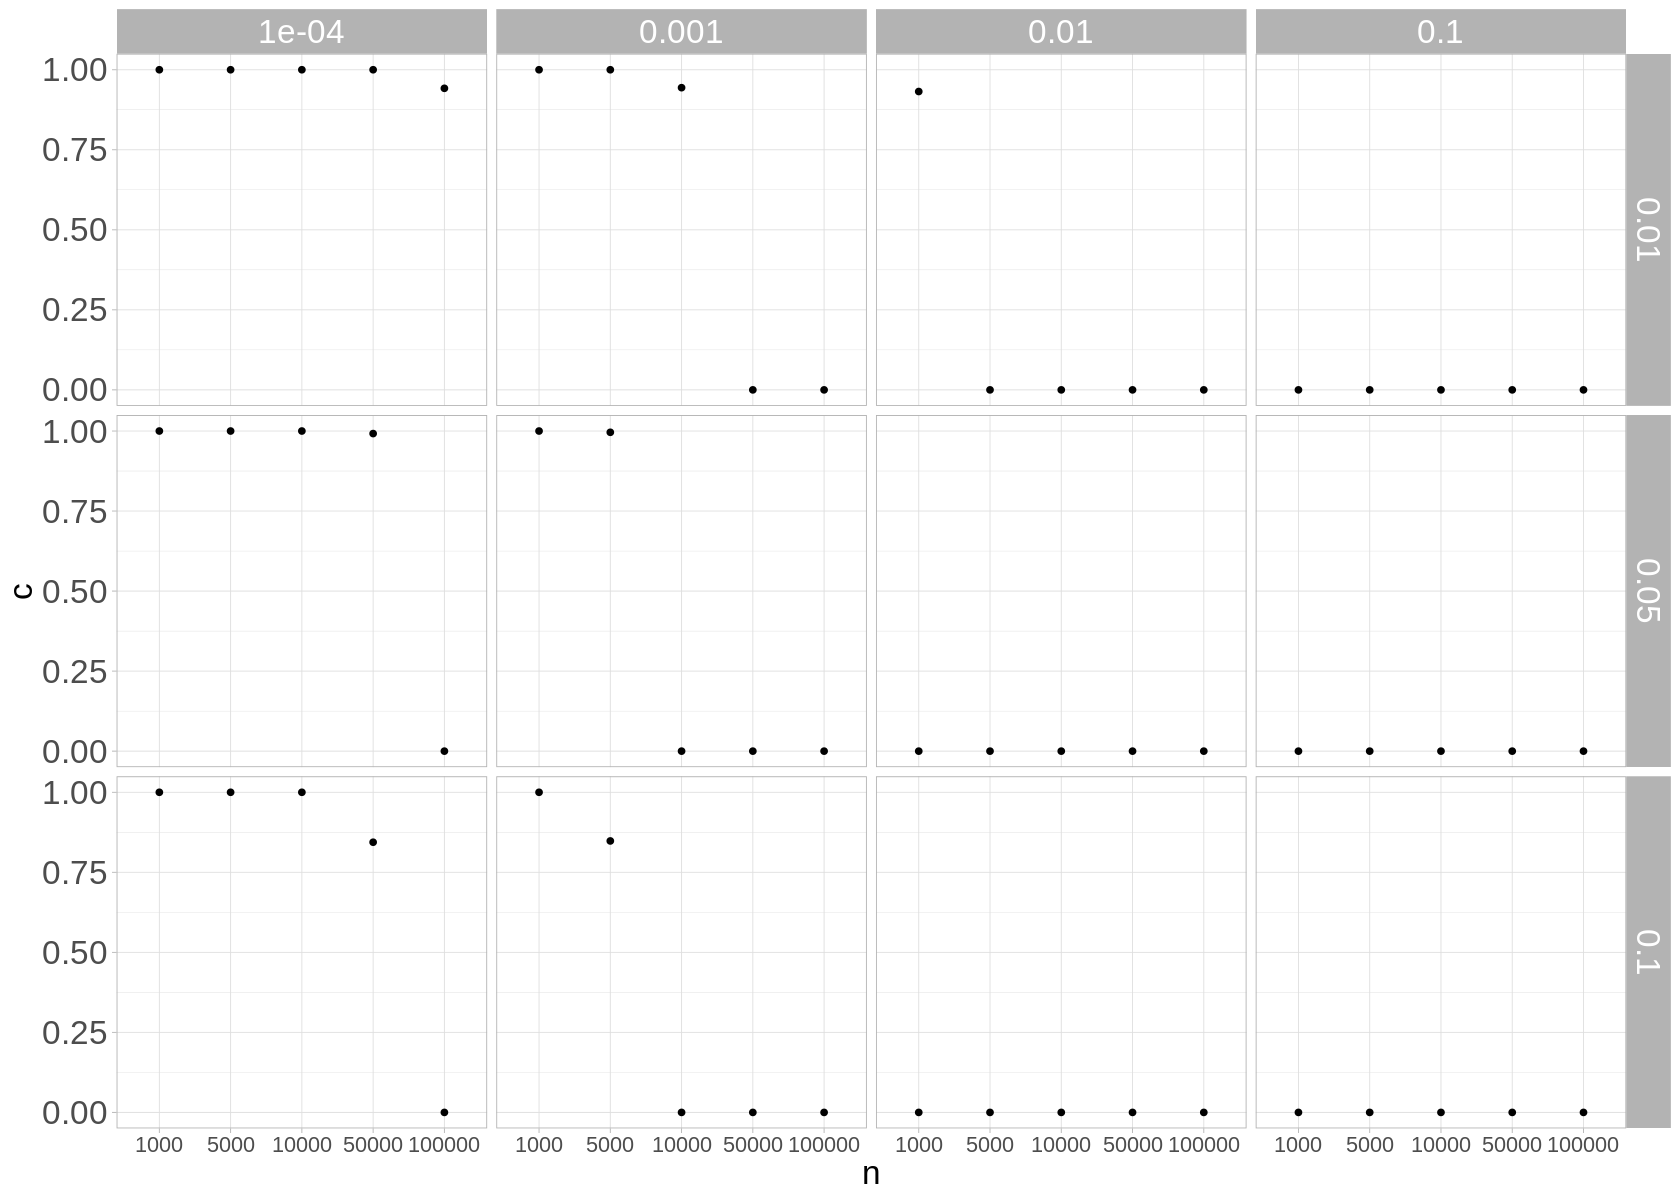

In [34]:
options(repr.plot.width=14, repr.plot.height=10, scipen=999)

ggplot() + geom_point(data=unbound_res, aes(x=as.factor(n), y=unbounded_rate)) + facet_grid(alphas ~ p) +
    xlab('n') +
    ylab('c') +
    theme_light() +
    theme(legend.title=element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=13), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20), strip.text.x = element_text(size = 20), strip.text.y = element_text(size = 20))

Seems like a lot of the tubes are unbounded up and to the right. Uh oh! So even though the coverage by and large looks sort of ok, for the low ps and lower sample sizes (with some notable exceptions) for sure the tubes are infinitely large which may not be particularly helpful!

This motivates looking at some better extreme value estimator in the tail..

## Extreme Survival Function

First, looking at coverage rates for the bivariate t distribution, where we assume we know the rate of decay of the tail of the distribution, but we are using nonparametric bootstrap to get estimates of the $1-\alpha$ quantile of the distribution of the empirical process. We are also using estimates of the $p_{n}$ isoline from the extreme value estimate of the survival function. 

Coverage results look pretty garbage; they get worse as n gets larger. Looking more deeply at the estimates of the $1-\alpha$ quantile of the empirical process for each simulation, it seems the distribution is biased low, and is continually so as $n \to \infty$.

In [74]:
library(latex2exp)

In [75]:
path <- '/pscratch/sd/j/jbbutler/extreme_bootstrap_c_tubes/bivt/full_coverage_results.RData'
confregs <- readRDS(path)

true_cs_1000 <- readRDS('/pscratch/sd/j/jbbutler/true_cs/bivt/n1000_p5_div_n.RData')
true_cs_5000 <- readRDS('/pscratch/sd/j/jbbutler/true_cs/bivt/n5000_p5_div_n.RData')
true_cs_10000 <- readRDS('/pscratch/sd/j/jbbutler/true_cs/bivt/n10000_p5_div_n.RData')
true_cs_50000 <- readRDS('/pscratch/sd/j/jbbutler/true_cs/bivt/n50000_p5_div_n.RData')

true_cs <- data.frame(cbind(true_cs_1000, true_cs_5000, true_cs_10000, true_cs_50000))
colnames(true_cs) <- c(1000, 5000, 10000, 50000)
emp_processes <- true_cs %>% gather('n', 'empirical_process')
emp_processes$n <- as.factor(as.numeric(emp_processes$n))

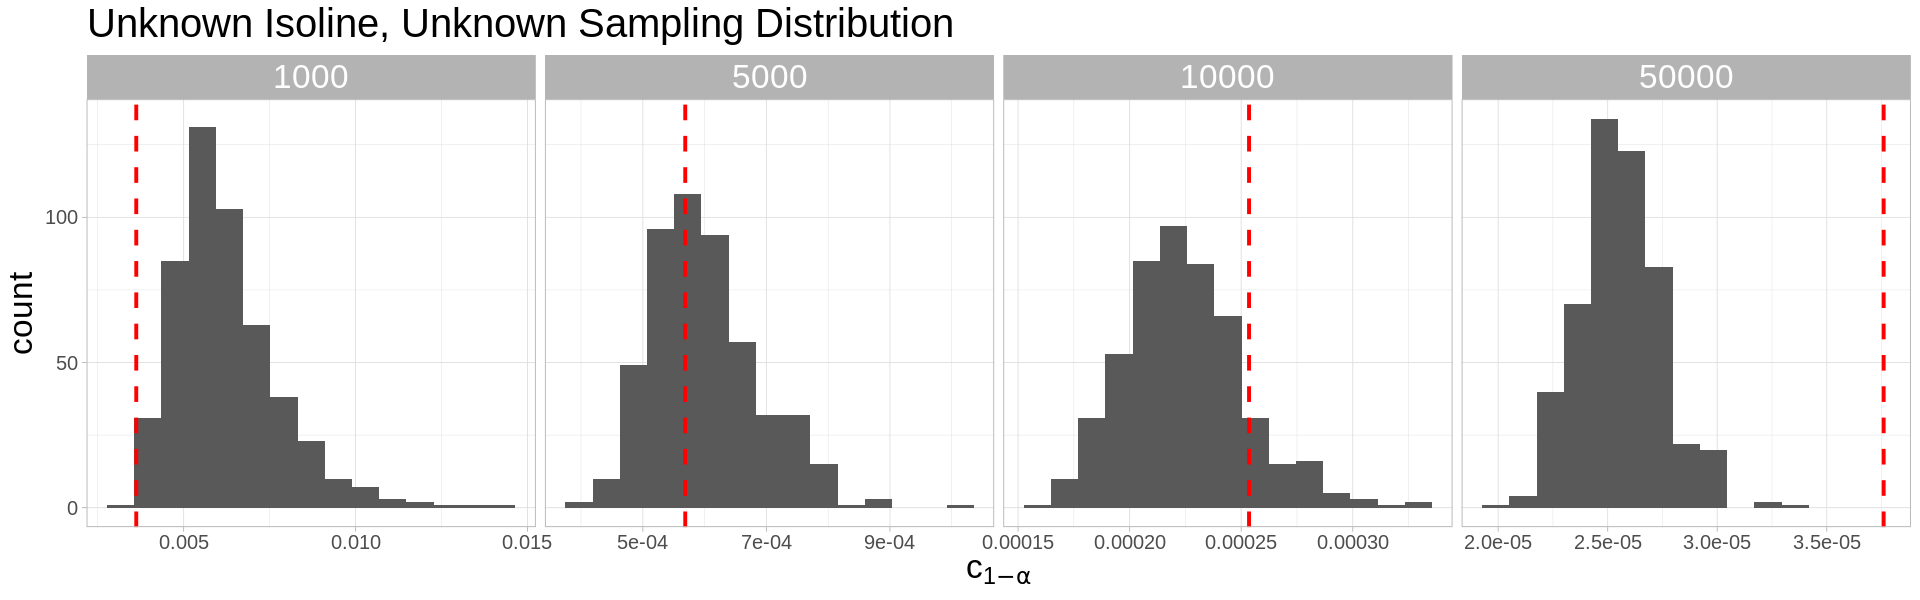

In [87]:
options(repr.plot.width=16, repr.plot.height=5)

confregs_alpha <- confregs %>% filter(alphas==0.05)

ggplot(data=confregs_alpha) + 
    geom_histogram(aes(x=c_alphas), bins=15) + 
    facet_wrap(n ~ ., scales='free_x', ncol=4) +
    geom_vline(data=emp_processes %>% group_by(n) %>% summarize(c_alpha=quantile(empirical_process, 0.95)), aes(xintercept=c_alpha), linetype='dashed', color='red', linewidth=1.1) + ggtitle('Unknown Isoline, Unknown Sampling Distribution') + xlab(TeX('$c_{1-\\alpha}$')) + theme_light() +
    theme(legend.title=element_text(size=20), legend.position=c(0.1,0.2), 
          legend.background=element_blank(), axis.text.x=element_text(size=12), axis.text.y=element_text(size=12),
         axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
         legend.text=element_text(size=20), strip.text = element_text(size = 20))
    

In [77]:
example_c <- confregs %>% filter(n==50000, alphas==0.05) %>% select(c_alphas) %>% pull()
c_success <- example_c[1]
c_fail <- example_c[2]

source('~/isolines_uq/scripts/R/confidence_regions_procedure/auxiliary_scripts/distributionIsolines.R')
source('~/isolines_uq/scripts/R/confidence_regions_procedure/auxiliary_scripts/utils.R')

In [78]:
n50000_tubes <- readRDS('/pscratch/sd/j/jbbutler/extreme_bootstrap_c_tubes/bivt/p5_div_n/n50000_tubes.RData')
dat_success <- n50000_tubes[[1]]$dat
isobound_1_success <- drawExtremeIsoline(dat_success, 5/50000 - c_success, 200, c(0,0), 1/2, 1/4)
isobound_2_success <- drawExtremeIsoline(dat_success, 5/50000 + c_success, 200, c(0,0), 1/2, 1/4)
dat_fail <- n50000_tubes[[2]]$dat
isobound_1_fail <- drawExtremeIsoline(dat_fail, 5/50000 - c_fail, 200, c(0,0), 1/2, 1/4)
isobound_2_fail <- drawExtremeIsoline(dat_fail, 5/50000 + c_fail, 200, c(0,0), 1/2, 1/4)

In [ ]:
true_iso <- drawIsoline('bivt', 200, c(20,20), c(0,0), 5/50000)

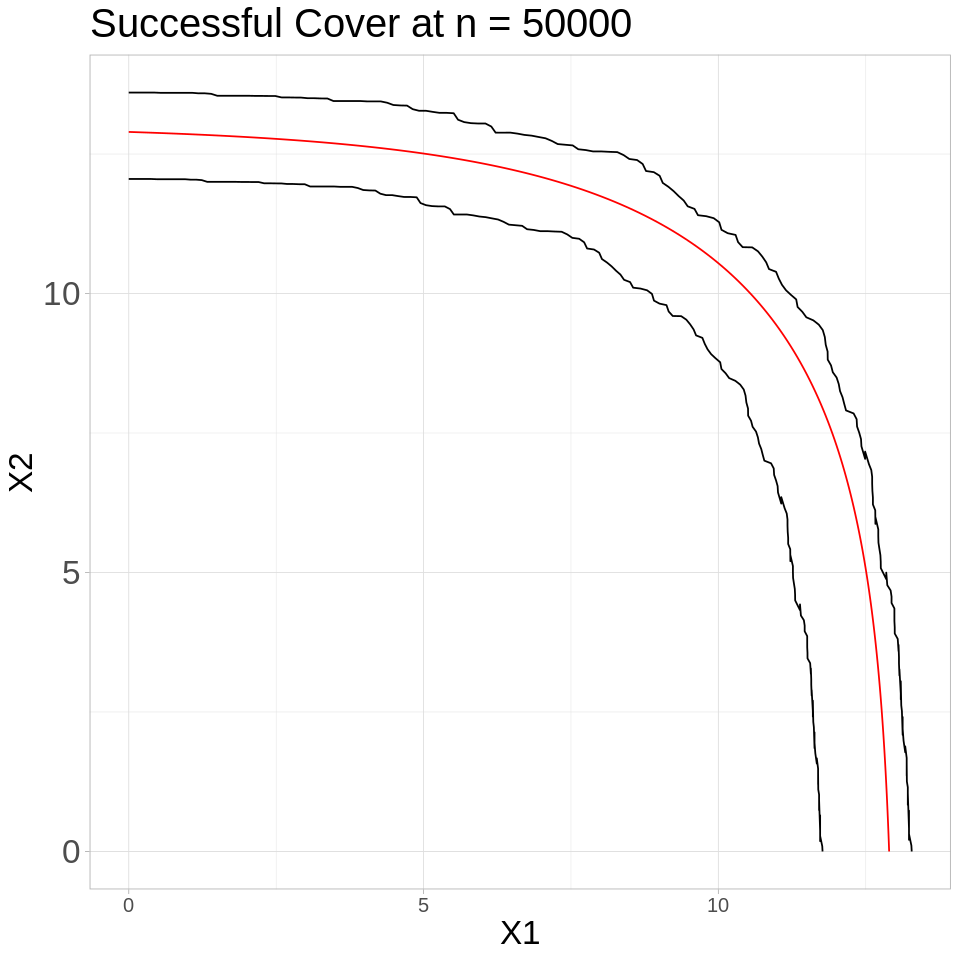

In [12]:
ggplot() + geom_line(data=true_iso, aes(x=X1, y=X2), color='red') + 
    ggtitle('Successful Cover at n = 50000') +
    geom_line(data=isobound_1_success, aes(x=X1, y=X2)) + 
    geom_line(data=isobound_2_success, aes(x=X1, y=X2)) + 
    theme_light() + theme(legend.title=element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=12), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))



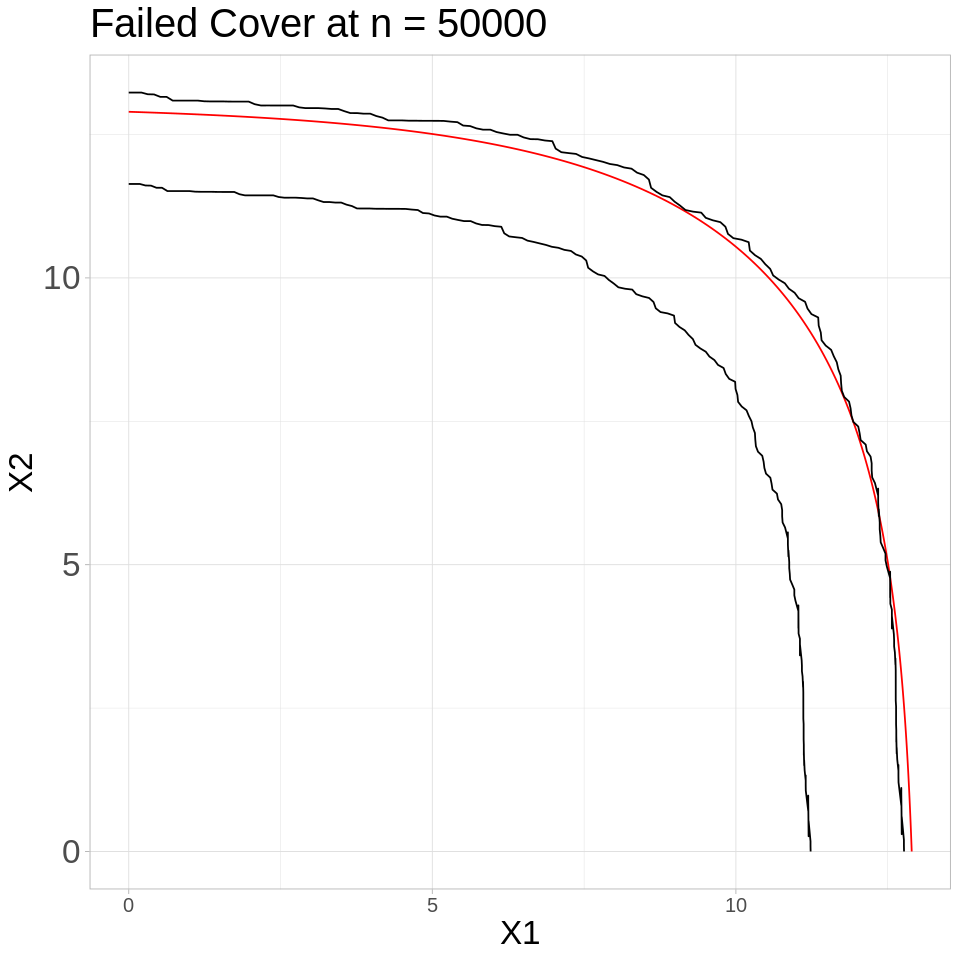

In [13]:
ggplot() + geom_line(data=true_iso, aes(x=X1, y=X2), color='red') + 
    ggtitle('Failed Cover at n = 50000') +
    geom_line(data=isobound_1_fail, aes(x=X1, y=X2)) + 
    geom_line(data=isobound_2_fail, aes(x=X1, y=X2)) + 
    theme_light() + theme(legend.title=element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=12), axis.text.y=element_text(size=20),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20))


So, it seems like there could be either of two things going on (inclusive):
+ Bias in the extreme value estimate of the survival function leads to bias in the estimate the isoline, so the set we are taking the sup over may not be where it should be.
+ We're bootstrapping in the tail (or, sort of out in the tail), and conventional wisdom says not to do this.

Below, we show distributions of the $1-\alpha$ quantile of the empirical process, determined through bootstrap for each simulation of data, but where we actually assume we know the distribution we are drawing from (i.e. we generate data from the bivariate t, so our estimates of the $1-\alpha$ quantile are the true $1-\alpha$ quantile taken over the estimate of the isoline). It seems that the $1-\alpha$ quantiles actually skew large, rather than small.

In [79]:
n1000 <- readRDS('/pscratch/sd/j/jbbutler/extreme_trueboot_c_tubes/bivt/n1000_p5_div_n.RData')
n5000 <- readRDS('/pscratch/sd/j/jbbutler/extreme_trueboot_c_tubes/bivt/n5000_p5_div_n.RData')
n10000 <- readRDS('/pscratch/sd/j/jbbutler/extreme_trueboot_c_tubes/bivt/n10000_p5_div_n.RData')
n50000 <- readRDS('/pscratch/sd/j/jbbutler/extreme_trueboot_c_tubes/bivt/n50000_p5_div_n.RData')

In [80]:
n1000_cs <- rep(NA, length=500)
n5000_cs <- rep(NA, length=500)
n10000_cs <- rep(NA, length=500)
n50000_cs <- rep(NA, length=500)

alpha <- 0.05

for (i in 1:500) {

    n1000_cs[i] <- quantile(n1000[[i]], 1-alpha)
    n5000_cs[i] <- quantile(n5000[[i]], 1-alpha)
    n10000_cs[i] <- quantile(n10000[[i]], 1-alpha)
    n50000_cs[i] <- quantile(n50000[[i]], 1-alpha)
    
}

cs <- data.frame(cbind(n1000_cs, n5000_cs, n10000_cs, n50000_cs))
colnames(cs) <- c(1000, 5000, 10000, 50000)
emp_processes_est <- cs %>% gather('n', 'empirical_process')
emp_processes_est$n <- as.factor(as.numeric(emp_processes_est$n))

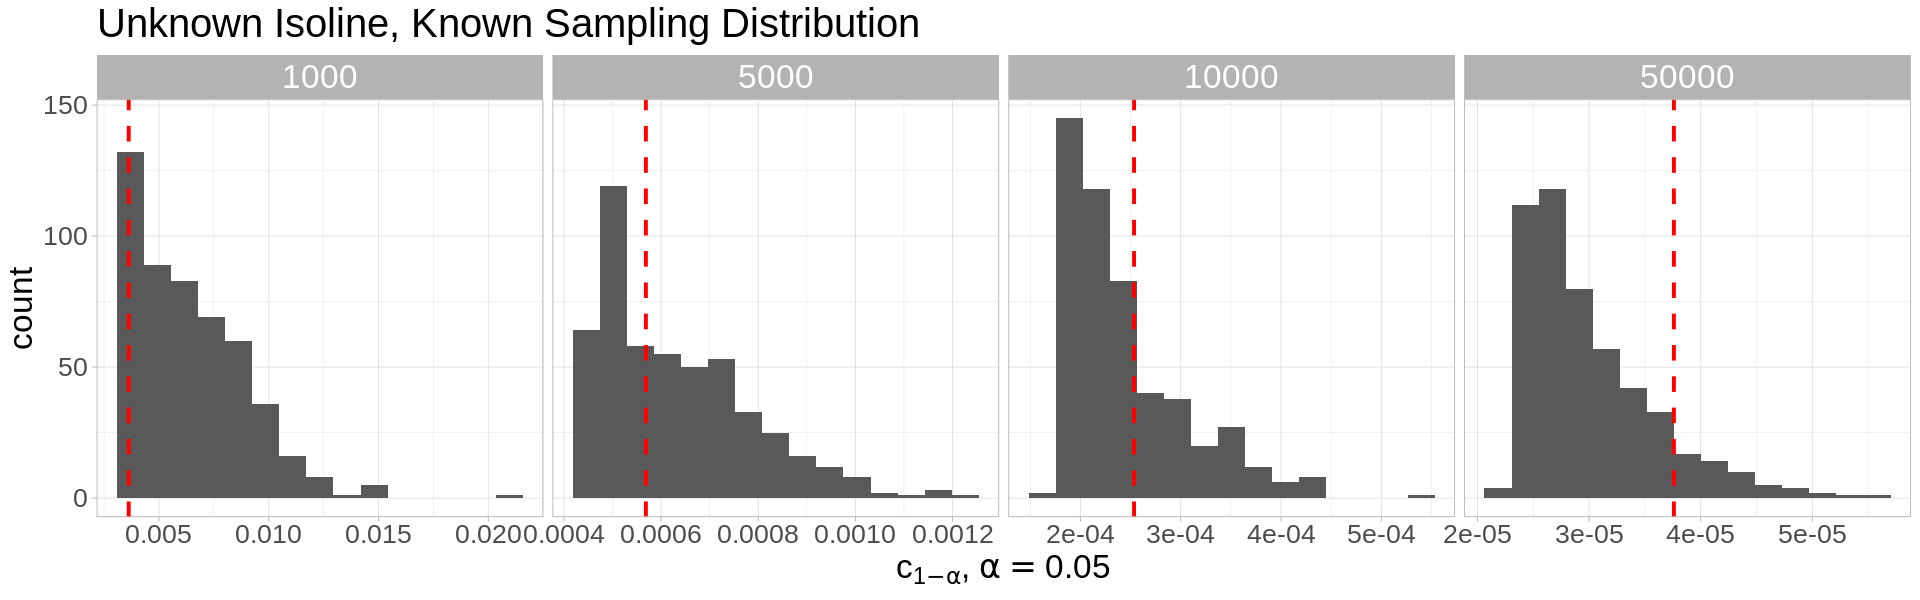

In [82]:
ggplot(data=emp_processes_est) + 
    geom_histogram(aes(x=empirical_process), bins=15) + 
    facet_wrap(n ~ ., scales='free_x', ncol=4) +
    geom_vline(data=emp_processes %>% group_by(n) %>% summarize(c_alpha=quantile(empirical_process, 0.95)), aes(xintercept=c_alpha), linetype='dashed', color='red', linewidth=1.1) + ggtitle('Unknown Isoline, Known Sampling Distribution') + xlab(TeX('$c_{1-\\alpha}$, $\\alpha=0.05$')) + theme_light() +
    theme(legend.title=element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=16), axis.text.y=element_text(size=16),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20), strip.text = element_text(size = 20))

Ok, well in `regularly_varying_survfunc.ipynb`

In [83]:
n1000 <- readRDS('/pscratch/sd/j/jbbutler/extreme_trueiso_c_tubes/bivt/n1000_p5_div_n.RData')
n5000 <- readRDS('/pscratch/sd/j/jbbutler/extreme_trueiso_c_tubes/bivt/n5000_p5_div_n.RData')
n10000 <- readRDS('/pscratch/sd/j/jbbutler/extreme_trueiso_c_tubes/bivt/n10000_p5_div_n.RData')
n50000 <- readRDS('/pscratch/sd/j/jbbutler/extreme_trueiso_c_tubes/bivt/n50000_p5_div_n.RData')

In [84]:
n1000_cs <- rep(NA, length=500)
n5000_cs <- rep(NA, length=500)
n10000_cs <- rep(NA, length=500)
n50000_cs <- rep(NA, length=500)

alpha <- 0.05

for (i in 1:500) {

    n1000_cs[i] <- quantile(n1000[[i]], 1-alpha)
    n5000_cs[i] <- quantile(n5000[[i]], 1-alpha)
    n10000_cs[i] <- quantile(n10000[[i]], 1-alpha)
    n50000_cs[i] <- quantile(n50000[[i]], 1-alpha)
    
}

cs <- data.frame(cbind(n1000_cs, n5000_cs, n10000_cs, n50000_cs))
colnames(cs) <- c(1000, 5000, 10000, 50000)
emp_processes_est <- cs %>% gather('n', 'empirical_process')

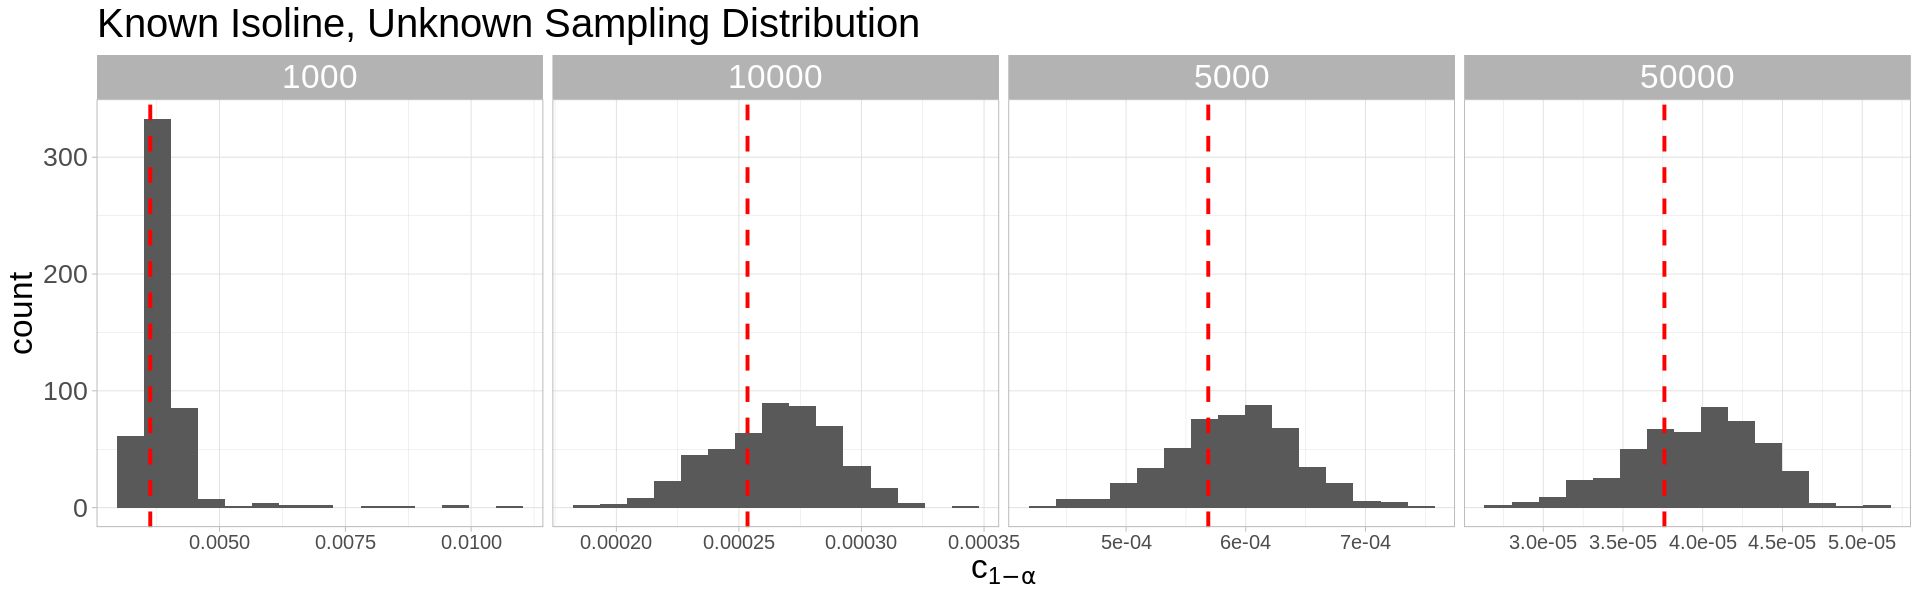

In [86]:
ggplot(data=emp_processes_est) + 
    geom_histogram(aes(x=empirical_process), bins=15) + 
    facet_wrap(n ~ ., scales='free_x', ncol=4) +
    geom_vline(data=emp_processes %>% group_by(n) %>% summarize(c_alpha=quantile(empirical_process, 0.95)), aes(xintercept=c_alpha), linetype='dashed', color='red', linewidth=1.1) + ggtitle('Known Isoline, Unknown Sampling Distribution') + xlab(TeX('$c_{1-\\alpha}$')) + theme_light() +
    theme(legend.title=element_text(size=20), legend.position=c(0.1,0.2), 
      legend.background=element_blank(), axis.text.x=element_text(size=12), axis.text.y=element_text(size=16),
     axis.title.x=element_text(size=20), axis.title.y=element_text(size=20), plot.title = element_text(size=24),
     legend.text=element_text(size=20), strip.text = element_text(size = 20))